In [104]:
#Loading dataset
import pandas as pd
df=pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [105]:
#Selecting only 2 features (as told in class)
from sklearn.preprocessing import StandardScaler
X=df[['Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

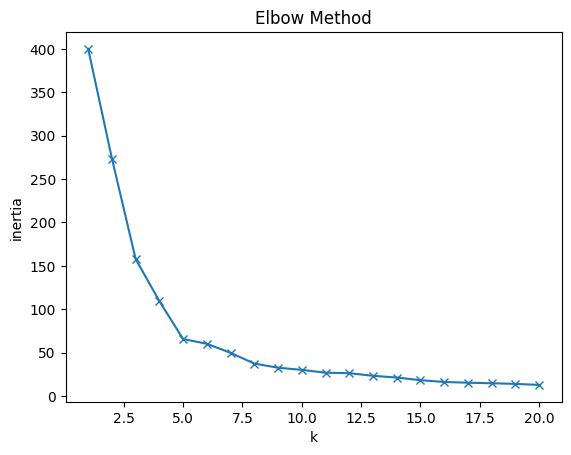

In [106]:
#Elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia=[]
for k in range(1,21):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(range(1,21),inertia,marker='x')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [107]:
#Implementing the model
model=KMeans(n_clusters=5,random_state=42)
model.fit(X_scaled)
df["labels"]=model.predict(X_scaled)

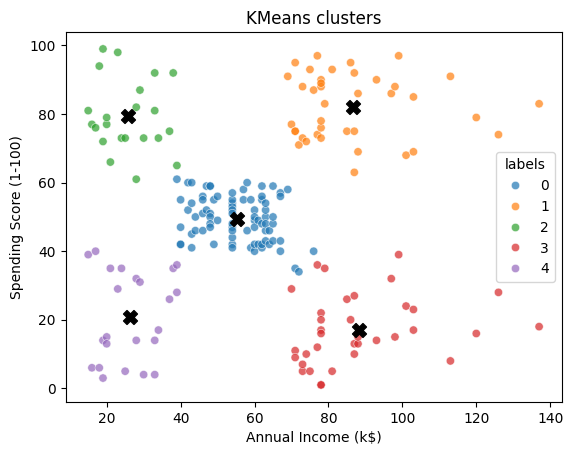

In [108]:
#Visualization with scatter plot
import seaborn as sns
centroids = scaler.inverse_transform(model.cluster_centers_)
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue="labels",palette="tab10",alpha=0.7)
plt.scatter(centroids[:,0], centroids[:,1], s=100, marker='X',c="black")
plt.title('KMeans clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [110]:
#Analysis of the clusters
print(df.groupby("labels")[['Annual Income (k$)','Spending Score (1-100)']].mean().round(1))

        Annual Income (k$)  Spending Score (1-100)
labels                                            
0                     55.3                    49.5
1                     86.5                    82.1
2                     25.7                    79.4
3                     88.2                    17.1
4                     26.3                    20.9


labels
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


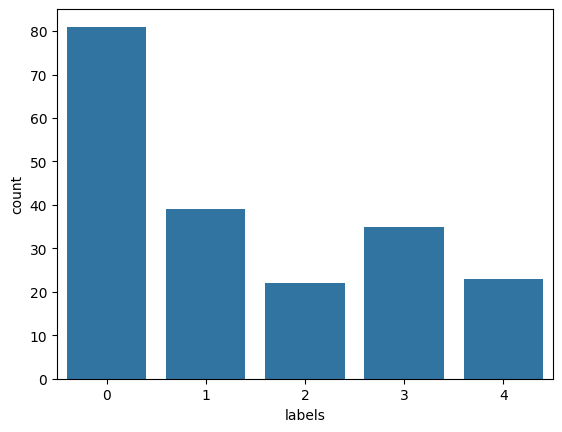

In [112]:
#Checking number of data points in each clusters
print(df["labels"].value_counts().sort_index())
sns.countplot(data=df,x="labels")
plt.show()